--- Processing model: Paccmann_MCA, study: gCSI ---
{'best': ['./Paccmann_MCA/gCSI/MEDIUM/best-18.json'], 'log': ['./Paccmann_MCA/gCSI/MEDIUM/deap-18.log'], 'fitnesses': ['./Paccmann_MCA/gCSI/MEDIUM/fitnesses-18.txt'], 'fitness': ['./Paccmann_MCA/gCSI/MEDIUM/fitness-18.txt'], 'hyperparams': ['./Paccmann_MCA/gCSI/MEDIUM/hyperparams.Paccmann_MCA.gCSI.medium.json'], 'cfg': ['./Paccmann_MCA/gCSI/MEDIUM/cfg-Paccmann_MCA-gCSI-medium.sh'], 'hpo': ['./Paccmann_MCA/gCSI/MEDIUM/hpo.csv']}
--- Processing model: Paccmann_MCA, study: CCLE ---
{'best': ['./Paccmann_MCA/CCLE/MEDIUM/best-24.json'], 'log': ['./Paccmann_MCA/CCLE/MEDIUM/deap-24.log'], 'fitnesses': ['./Paccmann_MCA/CCLE/MEDIUM/fitnesses-24.txt'], 'fitness': ['./Paccmann_MCA/CCLE/MEDIUM/fitness-24.txt'], 'hyperparams': ['./Paccmann_MCA/CCLE/MEDIUM/hyperparams.Paccmann_MCA.CCLE.medium.json'], 'cfg': ['./Paccmann_MCA/CCLE/MEDIUM/cfg-Paccmann_MCA-CCLE-medium.sh'], 'hpo': ['./Paccmann_MCA/CCLE/MEDIUM/hpo.csv']}
--- Processing model: GraphDRP, 

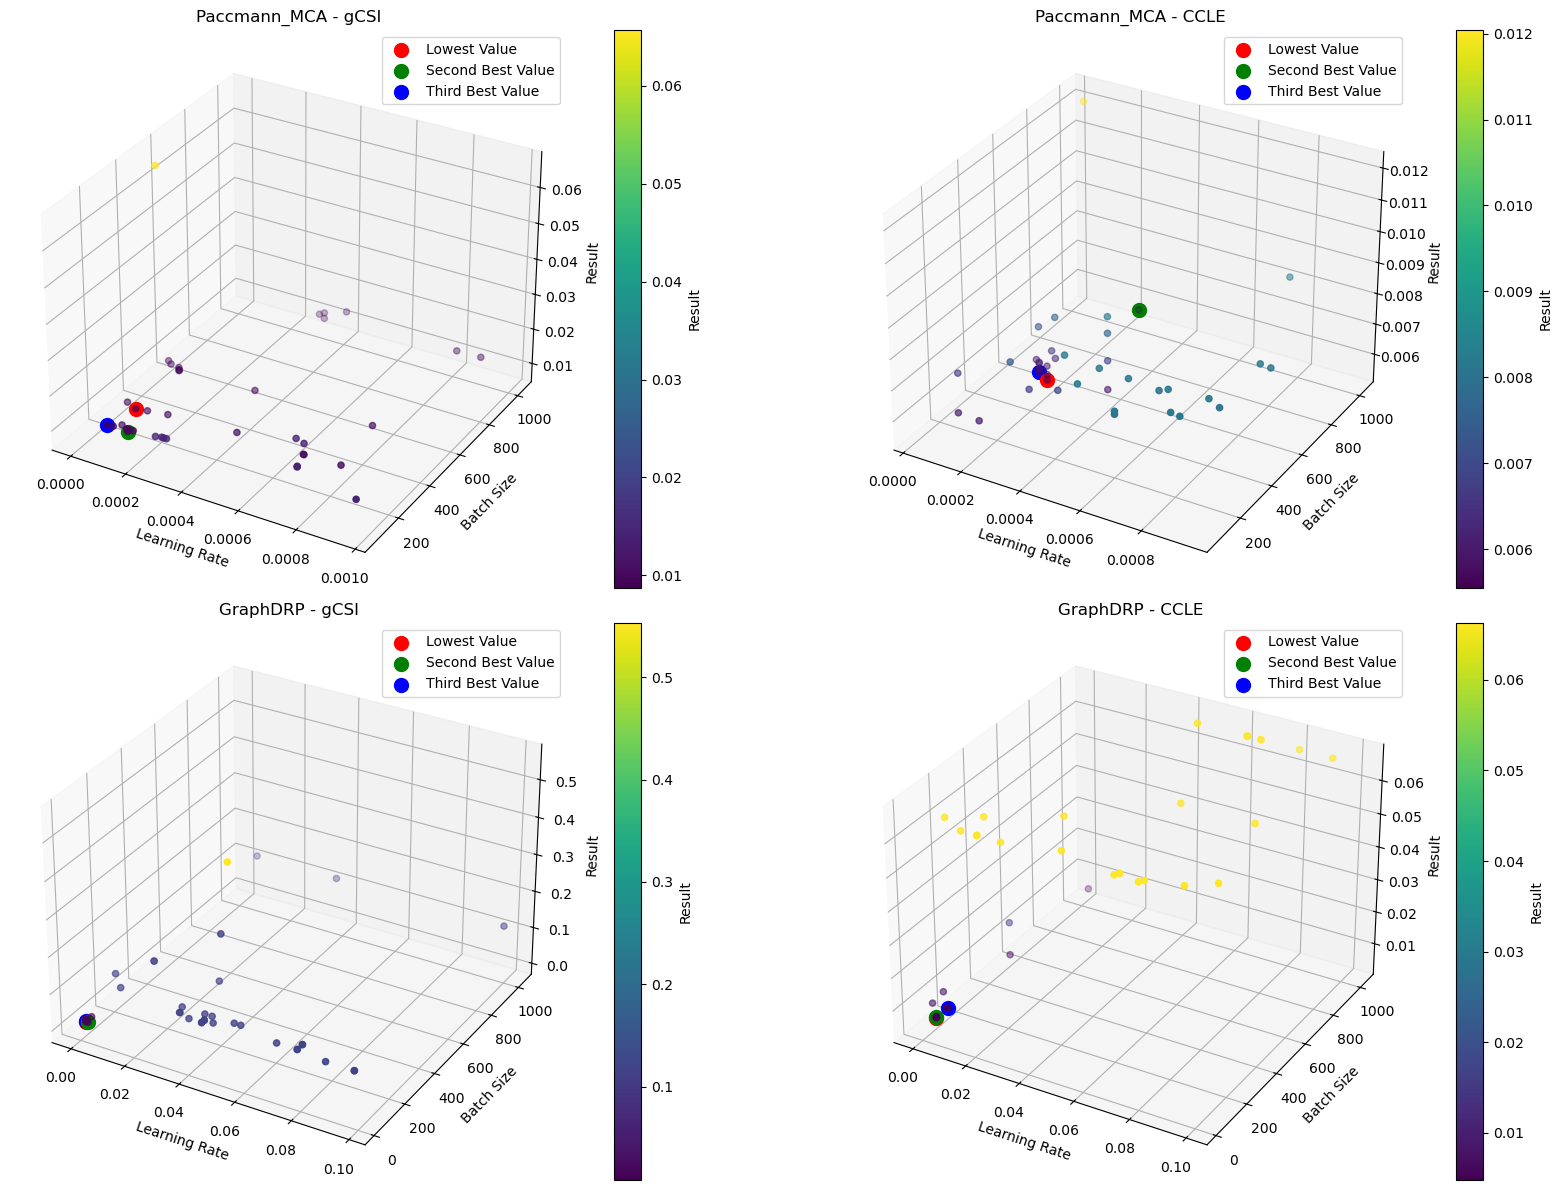

In [19]:
import json
import csv
import os
import glob
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def read_json(file_path):
    with open(file_path, 'r') as file:
        return json.load(file)

def read_log(file_path):
    with open(file_path, 'r') as file:
        return file.readlines()

def read_text(file_path):
    with open(file_path, 'r') as file:
        return file.read()

def read_csv(file_path):
    with open(file_path, 'r') as file:
        reader = csv.reader(file)
        return [row for row in reader]

def parse_files(base_dir, model, study, size):
    directory = os.path.join(base_dir, f"{model}", study, size.upper())
    files = {
        "best": glob.glob(os.path.join(directory, "best-*.json")),
        "log": glob.glob(os.path.join(directory, "deap-*.log")),
        "fitnesses": glob.glob(os.path.join(directory, "fitnesses-*.txt")),
        "fitness": glob.glob(os.path.join(directory, "fitness-*.txt")),
        "hyperparams": glob.glob(os.path.join(directory, "*param*.json")),
        "cfg": glob.glob(os.path.join(directory, "cfg-*.sh")),
        "hpo": [os.path.join(directory, "hpo.csv")]
    }
    print(files)
    data = {}
    
    data['best'] = [read_json(file) for file in files['best']]
    data['log'] = [read_log(file) for file in files['log']]
    data['fitnesses'] = [read_text(file) for file in files['fitnesses']]
    data['fitness'] = [read_text(file) for file in files['fitness']]
    data['hyperparams'] = [read_json(file) for file in files['hyperparams']]
    data['cfg'] = [read_text(file) for file in files['cfg']]
    data['hpo'] = [read_csv(file) for file in files['hpo']]
    
    return data

def extract_values(hpo_data):
    iterations = []
    results = []
    learning_rates = []
    batch_sizes = []
    
    for row in hpo_data[1:]:  # Skipping header row
        iteration = int(row[0])
        result = float(row[6])  # Assuming 'result' is the 7th column
        learning_rate = float(row[3])  # Assuming 'learning_rate' is the 4th column
        batch_size = int(row[2])  # Assuming 'batch_size' is the 3rd column
        
        iterations.append(iteration)
        results.append(result)
        learning_rates.append(learning_rate)
        batch_sizes.append(batch_size)
    
    return iterations, results, learning_rates, batch_sizes

if __name__ == "__main__":
    base_dir = "."
    models = ["Paccmann_MCA", "GraphDRP"]
    studies = ["gCSI", "CCLE"]
    size = "medium"
    
    fig = plt.figure(figsize=(18, 12))
    
    for i, model in enumerate(models):
        for j, study in enumerate(studies):
            print(f"--- Processing model: {model}, study: {study} ---")
            data = parse_files(base_dir, model, study, size)
            
            hpo_data = data['hpo'][0]
            iterations, results, learning_rates, batch_sizes = extract_values(hpo_data)
            
            # Find the indices of the best, second best, and third best results
            sorted_indices = sorted(range(len(results)), key=lambda k: results[k])
            min_index = sorted_indices[0]
            second_best_index = sorted_indices[1]
            third_best_index = sorted_indices[2]
            
            min_result = results[min_index]
            min_lr = learning_rates[min_index]
            min_bs = batch_sizes[min_index]
            
            second_best_result = results[second_best_index]
            second_best_lr = learning_rates[second_best_index]
            second_best_bs = batch_sizes[second_best_index]
            
            third_best_result = results[third_best_index]
            third_best_lr = learning_rates[third_best_index]
            third_best_bs = batch_sizes[third_best_index]
            
            ax = fig.add_subplot(len(models), len(studies), i * len(studies) + j + 1, projection='3d')
            scatter = ax.scatter(learning_rates, batch_sizes, results, c=results, cmap='viridis')
            ax.scatter(min_lr, min_bs, min_result, color='r', s=100, label='Lowest Value')
            ax.scatter(second_best_lr, second_best_bs, second_best_result, color='g', s=100, label='Second Best Value')
            ax.scatter(third_best_lr, third_best_bs, third_best_result, color='b', s=100, label='Third Best Value')
            
            ax.set_xlabel('Learning Rate')
            ax.set_ylabel('Batch Size')
            ax.set_zlabel('Result')
            ax.set_title(f'{model} - {study}')
            ax.legend()
            fig.colorbar(scatter, ax=ax, label='Result')
    
    plt.tight_layout()
    plt.show()


--- Processing model: Paccmann_MCA, study: gCSI ---
{'best': ['./Paccmann_MCA/gCSI/MEDIUM/best-18.json'], 'log': ['./Paccmann_MCA/gCSI/MEDIUM/deap-18.log'], 'fitnesses': ['./Paccmann_MCA/gCSI/MEDIUM/fitnesses-18.txt'], 'fitness': ['./Paccmann_MCA/gCSI/MEDIUM/fitness-18.txt'], 'hyperparams': ['./Paccmann_MCA/gCSI/MEDIUM/hyperparams.Paccmann_MCA.gCSI.medium.json'], 'cfg': ['./Paccmann_MCA/gCSI/MEDIUM/cfg-Paccmann_MCA-gCSI-medium.sh'], 'hpo': ['./Paccmann_MCA/gCSI/MEDIUM/hpo.csv']}
--- Processing model: Paccmann_MCA, study: CCLE ---
{'best': ['./Paccmann_MCA/CCLE/MEDIUM/best-24.json'], 'log': ['./Paccmann_MCA/CCLE/MEDIUM/deap-24.log'], 'fitnesses': ['./Paccmann_MCA/CCLE/MEDIUM/fitnesses-24.txt'], 'fitness': ['./Paccmann_MCA/CCLE/MEDIUM/fitness-24.txt'], 'hyperparams': ['./Paccmann_MCA/CCLE/MEDIUM/hyperparams.Paccmann_MCA.CCLE.medium.json'], 'cfg': ['./Paccmann_MCA/CCLE/MEDIUM/cfg-Paccmann_MCA-CCLE-medium.sh'], 'hpo': ['./Paccmann_MCA/CCLE/MEDIUM/hpo.csv']}
--- Processing model: GraphDRP, 

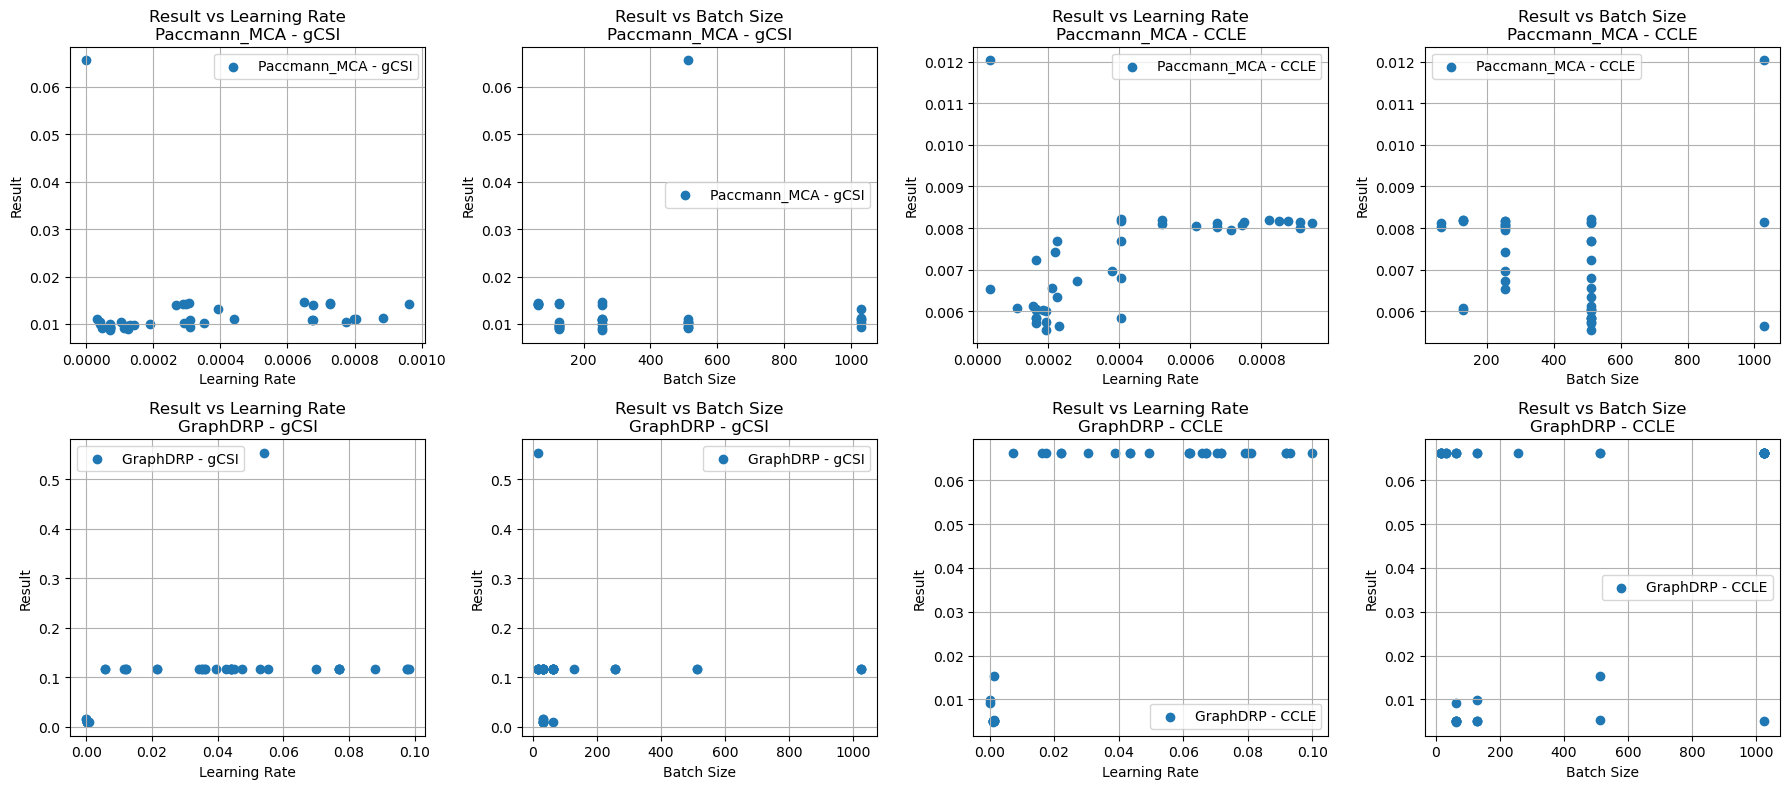

In [22]:
fig, axes = plt.subplots(len(models), len(studies) * 2, figsize=(18, 8))

for i, model in enumerate(models):
    for j, study in enumerate(studies):
        print(f"--- Processing model: {model}, study: {study} ---")
        data = parse_files(base_dir, model, study, size)
        
        hpo_data = data['hpo'][0]
        iterations, results, learning_rates, batch_sizes = extract_values(hpo_data)
        
        label = f"{model} - {study}"
        
        # Plot Result vs Learning Rate
        ax = axes[i, j*2]
        ax.scatter(learning_rates, results, label=label)
        ax.set_xlabel('Learning Rate')
        ax.set_ylabel('Result')
        ax.set_title(f'Result vs Learning Rate\n{label}')
        ax.legend()
        ax.grid(True)
        
        # Plot Result vs Batch Size
        ax = axes[i, j*2+1]
        ax.scatter(batch_sizes, results, label=label)
        ax.set_xlabel('Batch Size')
        ax.set_ylabel('Result')
        ax.set_title(f'Result vs Batch Size\n{label}')
        ax.legend()
        ax.grid(True)

plt.tight_layout()
plt.show()

--- Processing model: Paccmann_MCA, study: gCSI ---
{'best': ['./Paccmann_MCA/gCSI/MEDIUM/best-18.json'], 'log': ['./Paccmann_MCA/gCSI/MEDIUM/deap-18.log'], 'fitnesses': ['./Paccmann_MCA/gCSI/MEDIUM/fitnesses-18.txt'], 'fitness': ['./Paccmann_MCA/gCSI/MEDIUM/fitness-18.txt'], 'hyperparams': ['./Paccmann_MCA/gCSI/MEDIUM/hyperparams.Paccmann_MCA.gCSI.medium.json'], 'cfg': ['./Paccmann_MCA/gCSI/MEDIUM/cfg-Paccmann_MCA-gCSI-medium.sh'], 'hpo': ['./Paccmann_MCA/gCSI/MEDIUM/hpo.csv']}
--- Processing model: Paccmann_MCA, study: CCLE ---
{'best': ['./Paccmann_MCA/CCLE/MEDIUM/best-24.json'], 'log': ['./Paccmann_MCA/CCLE/MEDIUM/deap-24.log'], 'fitnesses': ['./Paccmann_MCA/CCLE/MEDIUM/fitnesses-24.txt'], 'fitness': ['./Paccmann_MCA/CCLE/MEDIUM/fitness-24.txt'], 'hyperparams': ['./Paccmann_MCA/CCLE/MEDIUM/hyperparams.Paccmann_MCA.CCLE.medium.json'], 'cfg': ['./Paccmann_MCA/CCLE/MEDIUM/cfg-Paccmann_MCA-CCLE-medium.sh'], 'hpo': ['./Paccmann_MCA/CCLE/MEDIUM/hpo.csv']}
--- Processing model: GraphDRP, 

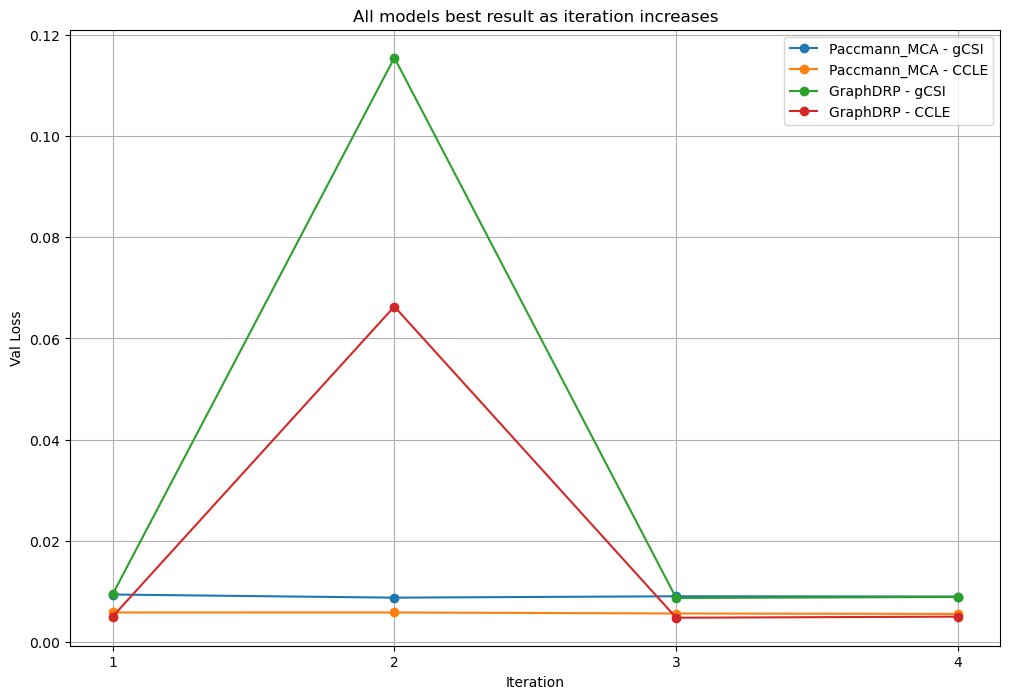

In [24]:
plt.figure(figsize=(12, 8))

for model in models:
   for study in studies:
      print(f"--- Processing model: {model}, study: {study} ---")
      data = parse_files(base_dir, model, study, size)
      all_data.append(data)
      
      hpo_data = data['hpo'][0]
      iterations, smallest_values = extract_smallest_values(hpo_data)
      
      label = f"{model} - {study}"
      plt.plot(iterations, smallest_values, marker='o', label=label)

plt.xlabel('Iteration')
plt.ylabel('Val Loss')
plt.title('All models best result as iteration increases')
plt.legend()
plt.grid(True)

# Set x-axis ticks to be integers
max_iteration = max([max(data[0]) for data in [extract_smallest_values(d['hpo'][0]) for d in all_data]])
plt.xticks(range(1, max_iteration + 1))

plt.show()